Saving 0_xU_JU-koTbA5uHLD.png to 0_xU_JU-koTbA5uHLD (4).png


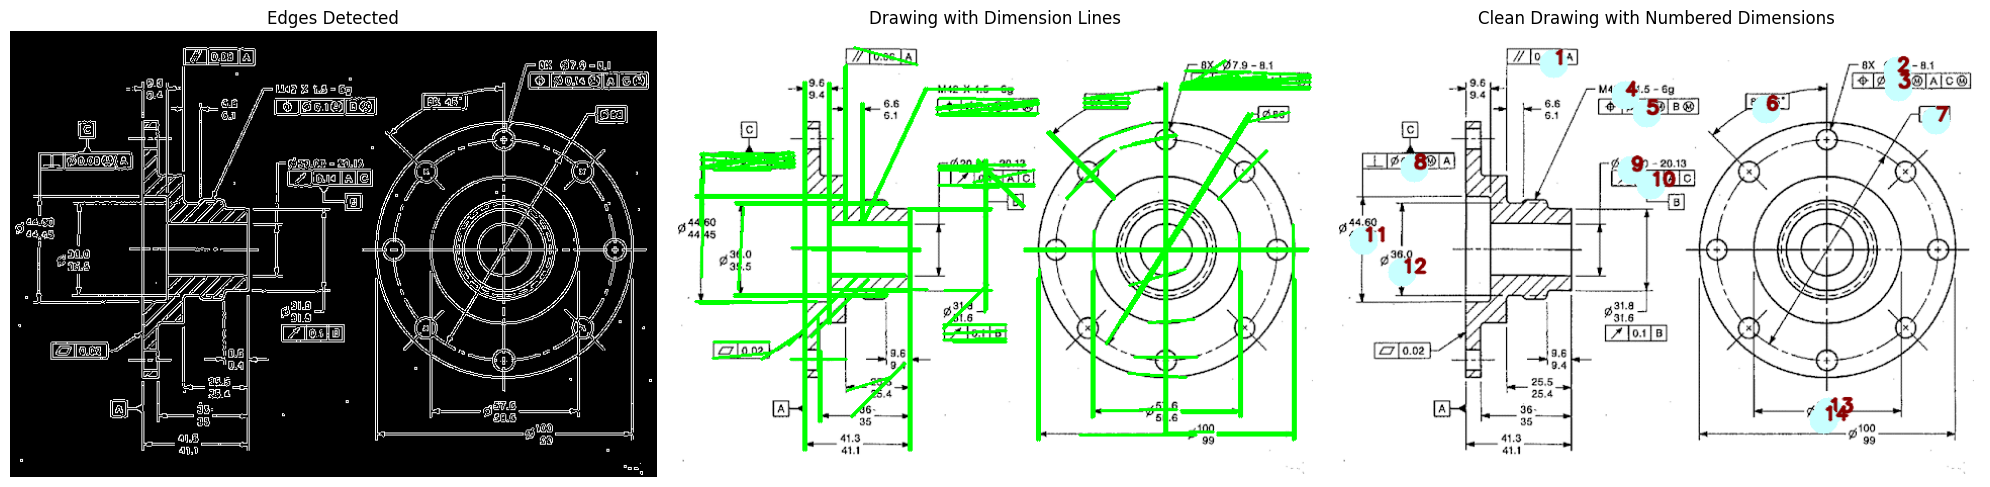


📏 Dimension Legend:

 1: 0D6 14
 2: 07.9
 3: 04i
 4: 042 × 1.5
 5: 001Ø
 6: 8X 45
 7: 086
 8: 00.08 Ø
 9: 220CQ
10: 0.14
11: 27.43
12: 35.5
13: 57.6
14: 256.6


In [ ]:
# Install dependencies (for Google Colab)
!pip install easyocr opencv-python-headless matplotlib scipy

# Upload an image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from scipy.spatial import distance

# Helper: Clean OCR text
def clean_ocr_text(text):
    return (
        text.replace(',', '.')
            .replace('|', '1')
            .replace('O', '0')
            .replace('@', 'Ø')
            .replace('*', '×')
            .strip()
    )

# Initialize OCR reader
reader = easyocr.Reader(['en'])

# Main function
def detect_dimensions_with_legend_and_clean_overlay(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    # Create different drawing layers
    line_image = image.copy()
    number_only_image = image.copy()

    # Detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=40, maxLineGap=10)
    if lines is not None:
        for x1, y1, x2, y2 in lines[:, 0]:
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # OCR dimension detection
    results = reader.readtext(gray)
    legend = []
    index_counter = 1

    for (bbox, text, conf) in results:
        cleaned_text = clean_ocr_text(text)
        if any(c.isdigit() for c in cleaned_text) and len(cleaned_text) <= 10:
            (tl, tr, br, bl) = bbox
            tl = tuple(map(int, tl))
            br = tuple(map(int, br))
            center_text = np.mean([tl, br], axis=0).astype(int)
            center_text = (center_text[0], center_text[1] + 5)  # vertical centering

            # On clean drawing: draw yellow circle and number
            cv2.circle(number_only_image, center_text, 14, (255, 255, 200), -1)  # Light background
            cv2.putText(number_only_image, str(index_counter), center_text, cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (0, 0, 139), 2, cv2.LINE_AA)

            legend.append((index_counter, cleaned_text))
            index_counter += 1

    return edges, line_image, number_only_image, legend

# Run the function
edges_img, line_drawing_img, clean_numbered_img, dimension_legend = detect_dimensions_with_legend_and_clean_overlay(image_path)

# Show results
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(edges_img, cmap='gray')
plt.title("Edges Detected")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(line_drawing_img, cv2.COLOR_BGR2RGB))
plt.title("Drawing with Dimension Lines")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(clean_numbered_img, cv2.COLOR_BGR2RGB))
plt.title("Clean Drawing with Numbered Dimensions")
plt.axis("off")

plt.tight_layout()
plt.show()

# Print legend
print("\n📏 Dimension Legend:\n")
for idx, dim in dimension_legend:
    print(f"{idx:>2}: {dim}")
